# AdaBoost

在做重要决定的时候,我们会考虑吸收多个专家的意见而不是一个人的意见,机器学习处理问题的时候也可以采用这种方法.这就是元算法(meta-algorithm)背后的思路.元算法是对其他算法进行组合的一种方式,我们会先建立一个**单层决策树(decision stump)**分类器，实际上它是一个单节点的决策树.AdaBoots算法将应用在上述单层决策树之上,然后将在一个难数据集上应用AdaBoots分类器,以了解该算法是如何迅速超越其他分类器的.

强可学习(strongly learnable)和弱可学习(weakly learnable)

- 强可学习:如果存在一个多项式学习算法,并且它的学习率很高,那么我们就称这个概念为**强可学习**.
- 若可学习:如果存在一个多项式学习算法,它的学习率只比随机猜测略好,那么就称这个概念为**若可学习**

AdaBoost algorithm 是将弱可学习变为强可学习算法中最具有代表性的算法.

对着提升方法来说,两个问题需要回答:一是在每一轮如何改变训练数据的权值或概率分布;二是如何将弱分类器组合成一个强分类器.关于第一个问题Adaboost的做法是,提高那些被前一轮弱分类器分类错误的样本权值,而降低那些被正确分类样本权值.这样一来,那些没有得到正确分类的数据,由于其权值的增大而获得更多的"关注".至于第2个问题,adaboost才用加权多数表决法的方法.具体的而言就是,加大分类错误率小的弱分类器权值,使其在表中起更大的作用,减小分类误差率大的弱分类器的权值,在表决中起较小的作用.

可以取看看boosting和bagging的不同之处

### AdaBoost 算法(boosting)

假定一个二分类分类的训练集

$T={(x_1,y_1),...,(x_n,y_n)}$

其中每一个点由实例和样本标签组成.实例$x_i \in X\subseteqq R^{n}$,标记$y_i \in Y={-1,+1}$,X是实例空间,Y是标记集合.Adaboost利用以下算法,从训练数据样本中学习一系列弱分类器或基本分类器,并将这些弱分类器线性组合成一个强分类器.

#### AdaBoost

输入:训练样本数据集$T={(x_1,y_1),...,(x_n,y_n)}$,其中$x_i \in X\subseteqq R^{n}$,$y_i \in Y={-1,+1}$;弱学习算法;

输出:最终分类器$G(x)$

(1) 初始化训练数据的权重值分布(在初始化的时候将所有样本的权重赋予相同值)

$D_1=(w_{11},w_{12},...w_{1i},w_{1N}),w_1i = \frac{1}{N},i=1,2,...N$

(2) 对$m=1,2,...,M$(需要执行人为定义的M轮)

(a) 使用具有权值分布的$D_m$的训练数据集学习,得到基本分类器

$G_m(x):X\rightarrow {+1,-1}$

(b) 计算$G_m(x)$在训练数据集上的分类错误率

$e_m = P(G_m(x_i) \neq y_i)=\sum_{i=1}^{N}w_{mi}I(G_m(x_i)\neq y_i)$

(c) 计算$G_m(x)$的系数

$\alpha_m=\frac{1}{2}log(\frac{1-e_m}{e_m})$,这里的log是自然对数

(d) 更新训练数据集的权值分布

$D_{m+1}=(w_{m+1,1},w_{m+1,2},...w_{m+1,i},w_{m+1,N})$

$w_{m+1,i}=\frac{w_{m,i}}{Z_{m}}exp(-\alpha_m \cdot y_i \cdot G(x_i)),i=1,2,...N$

这里,$Z_{m}$是规范化因子

$Z_{m}=\sum_{i=1}^{N}w_{mi}exp(-\alpha_m \cdot y_i \cdot G(x_i))$

它使$D_{m+1}$成为一个概率分布



(3) 构建基本分类器的线性组合

$f(x)=\sum_{m=1}^{M}\alpha_m G_{m}(x)$

最终得到分类器

$G(x)=sign(f(x))=sign\begin{pmatrix}
\sum_{m=1}^{M}\alpha_mG_m(x)
\end{pmatrix}$

<p style="color:blue">这里的sign是符号的意思,也就是说如果求出来为负,那么是一类,如果为正数,那么是另一类</p>

**对Adaboost的算法说明:**

步骤(1) 假设训练数据集具有均匀的权值分布,即每个训练样本在基本分类器的学习中作用是相同,这一假设保证第一步能够在原始数据集上学习基本分类器$G_1(x)$.

步骤(2) adaboost反复学习基本分类器,在每一轮$m=1,2,..,M$顺次的执行如下操作:
- (a) 使用当前分布$D_m$加权的训练数据,学习基本分类器$G_m(x)$
- (b) 计算基本分类器$G_m(x)$在加权训练数据集上的分类误差率:
    - $e_m = P(G_m(x_i) \neq y_i)=\sum_{i=1}^{N}w_{mi}I(G_m(x_i)\neq y_i)$
    - 这里,$w_mi$表示第m轮中第i个实例的权值,$\sum_{i=1}^{N}w_{mi}=1$
    
- (c) 计算基本分类器$G(x)$的系数$\alpha_m$,$\alpha_m$表示$G_m(x)$在最终分类器的权重性质.
    - 当$e_m\leqslant \frac{1}{2}$,$\alpha \geqslant 0,$并且$a_m$随着$e_m$的减少而增大,所以分类误差率越小的基本分类器在最终的分类作用越大
    
- (d) 更新训练数据的权值分布为下一轮做准备.
    - $\left\{\begin{matrix}
\frac{w_{mi}}{Z_m}e^{-\alpha}, &G_m(x_i)=y_i \\ 
 \frac{w_{mi}}{Z_m}e^{\alpha}& G_m(x_i)\neq y_i
\end{matrix}\right.$

步骤(3) 线性组合$f(x)$实现M个基本分类器的加权表决.系数$\alpha_m$表示了$G_m(x)$的重要性,但是这里所有的$\alpha_m$之和并不为1.$f(x)$的符号决定了实例x的类,$f(x)$的绝对值表示了分类的确信度.


### AdaBoost的例子

给出如下表,假设多分类器是由$x<v$或者$x>v$产生,其中阈值为v使该分类器在训练数据集上分类错误率最低.

![](picture/34.png)

我们自定义选取的阈值为2.5,5.5,8.5

初始化数据权值分布

$D_1=(w_{11},w_{12},...,w_{110})$

$w_{1i}=\frac{1}{10} = 0.1,i=1,2,...,10$

**对m=1,**

(a) 在权值分布为$D_1$的训练数据集上,阈值v依次取值2.5,5.5,8.5时,且分别尝试**符号选择1,-1**时,错误率2.5或者8.5最低,那么我们先选取2.5,故基本分类器为:

$G_1(x)=\left\{\begin{matrix}
1, &x<2.5\\ 
 -1,&x>2.5
\end{matrix}\right.$

**Note:**这里的符号选择是指,当我们选取某个阈值的时候,将其预测的分类分别使用1,-1尝试计算错误率,比如当我们选取阈值2.5时候,我们有两种选择方法:
- $\left\{\begin{matrix}
1, &x<2.5\\ 
 -1,&x>2.5
\end{matrix}\right.$

- $\left\{\begin{matrix}
1, &x>2.5\\ 
 -1,&x<2.5
\end{matrix}\right.$

(b) 计算$G_1(x)$在训练集上的错误率为$e_m = P(G_m(x_i) \neq y_i)=\sum_{i=1}^{N}w_{mi}I(G_m(x_i)\neq y_i)=0.1+0.1+0.1$这里分类错误的分别是x=6,7,8

(c) 计算$G_1(x)$的系数:$\alpha_1 = \frac{1}{2}log\frac{1-e_1}{e_1}=0.4236.$

(d) 更新训练样本的权值分布:

$D_2=(w_{21},...w_{210})$

$w_{wi}=\frac{w_1i}{Z_m}exp(-\alpha_1 y_i G_1(x_i)), i=1,2,...10$

$D_2=(0.0715,0.0715,0.0715,0.0715,0.0715,0.0715,0.1666,0.1666,0.1666,0.0715)$

$f_1(x)=0.4236G_1(x)$

再使用分类器$sign[f_1(x)]$在训练数据集上进行分类,发现错误的点有3个.

**对m=2,**

(a) 在权值分布为 D2 的训练数据集上,阈值v依次取值2.5,5.5,8.5时,且分别尝试符号选择1,-1时,8.5最低,故基本分类器为:

$G_2(x)=\left\{\begin{matrix}
1, &x<8.5\\ 
 -1,&x>8.5
\end{matrix}\right.$

(b) 计算$G_2(x)$在训练集上的错误率为$e_m = P(G_m(x_i) \neq y_i)=\sum_{i=1}^{N}w_{mi}I(G_m(x_i)\neq y_i)=0.0715+0.0715+0.0715=0.2145$这里分类错误的分别是x=3,4,5

(c) 计算$G_2(x)$的系数:$\alpha_2 = \frac{1}{2}log\frac{1-e_2}{e_2}=0.6496.$


(d) 更新训练样本的权值分布:

$D_2=(0.0455,0.0455,0.0455,0.1667,0.1667,0.1667,0.1060,0.1060,0.1060,0.0455)$

$f_2(x)=0.4236G_1(x)+0.6496G_2(x)$

再使用分类器$sign[f_2(x)]$在训练数据集上进行分类,发现错误的点有3个.

**对m=3,**

(a) 在权值分布为 D1 的训练数据集上,阈值v依次取值2.5,5.5,8.5时,且分别尝试符号选择1,-1时,5.5最低,故基本分类器为:

$G_3(x)=\left\{\begin{matrix}
-1, &x<5.5\\ 
1,&x>5.5
\end{matrix}\right.$

(b) 计算$G_3(x)$在训练集上的错误率为$e_3=0.0455+0.0455+0.0455+0.0455=0.182$这里分类错误的分别是x=9,0,1,2

(c) 计算$G_3(x)$的系数:$\alpha_3 = \frac{1}{2}log\frac{1-e_3}{e_3}=0.7514.$


(d) 更新训练样本的权值分布:

$D_3=(0.125,0.125,0.125,0.102,0.102,0.102,0.065,0.065,0.065,0.125)$

$f_3(x)=0.4236G_1(x)+0.6496G_2(x)+0.7514G_3(x)$

再使用分类器$sign[f_3(x)]$在训练数据集上进行分类,发现错误的点有0个，分类完毕

所以最终的分类器为:

$G(x)=sign[f_3(x)=0.4236G_1(x)+0.6496G_2(x)+0.7514G_3(x)]$

## 下面将用Python代码实现

In [3]:
import numpy as np

1.首先我们创建一个模拟加载数据集,下面的为此例的数据集

In [4]:
def loadData():
    """
    loading data set 
    Returns:
        x: data set as x.
        y: data set as y.
        W: initialization weights.
    """
    x = np.array([0,1,2,3,4,5,6,7,8,9])
    y = np.array([1,1,1,-1,-1,-1,1,1,1,-1])
    W = np.abs(y) / len(y)
    return x,y,W

2.计算错误率，这里计算的错误率一定要走遍所有的阈值和方向的选取,最后返回出该轮最优阈值下的错误率最小的"基本分类器",这里的基本分类器是单层节点的决策分类器


$G_1(x)=\left\{\begin{matrix}
1, &x<thresh\\ 
 -1,&x>thresh
\end{matrix}\right.$

-------------

$G_2(x)=\left\{\begin{matrix}
-1, &x<thresh\\ 
 1,&x>thresh
\end{matrix}\right.$

In [5]:
def compute_error(threshs,x,y,W):
    """
    compute error in every threshs.
    
    Note:
        1.Make sure the source data set is clean,we need copy x and y
        2.initialization bestThresh_error is inf.
        
    
    Returns:
        bestThresh_error: The best error(minimum error) in some thresh.
        bestGx: The best G(x) in best thresh and minimum error.
        bestThresh_list: The best thresh,and split method.
    """
    x_copy = x.copy()  
    G_x1 = y.copy()
    G_x2 = y.copy()
    bestThresh_error = np.inf
    bestGx = None
    bestThresh_list = None
    for thresh in threshs:
        index_gt = np.where(x_copy>thresh)[0] # find index in copy data
        index_lt = np.where(x_copy<=thresh)[0]
        G_x1[index_gt] = -1. # changed values in copy data,Implementate thresh split
        G_x1[index_lt] = 1.

        G_x2[index_gt] = 1. # we need try two situations.
        G_x2[index_lt] = -1.
        
        # compute error 
        G_W1 = np.where(G_x1 != y) 
        error_1 = np.sum(W[G_W1])

        G_W2 = np.where(G_x2 != y)
        error_2 = np.sum(W[G_W2])
       
        # find the best error(minimum error),best thresh, best G(x)
        if error_1 < bestThresh_error or error_2 < bestThresh_error:
            if error_1 < error_2:
                bestThresh_error = error_1.copy()
                bestGx = G_x1.copy()
                bestThresh_list = [thresh,"G_x1"]
            else:
                bestThresh_error = error_2.copy()
                bestGx = G_x2.copy()
                bestThresh_list = [thresh,"G_x2"]
    return bestThresh_error,bestGx,bestThresh_list

3.计算G(x)的参数$\alpha$

In [6]:
def compute_alpha(error):
    """
    Implement compute alpha value.
    
    Returns:
        alpha: parameters in G(x)
    """
    alpha = 1./2. * (np.log((1.-error)/np.max(error+1e-16)))
    return  alpha

4.计算需要求出下一轮权重向量w的分母Z

In [7]:
def compute_Z(W,alpha,G_x,y):
    """
    compute Z value to compute D
    Returns:
        Z:parameters in compute W or (D)
    """
    return np.sum(W * np.exp(-alpha * y * G_x)),W

5.计算权重居中$D_{m+1}=(w_{m+1,1},w_{m+1,2},...w_{m+1,i},w_{m+1,N})$

In [8]:
def compute_W(W,Z,alpha,y,G_x):
    """
    Implementate compute W(D)
    
    returns:
        W: weigths vector.
    """
    W = W/Z * np.exp(-alpha * y * G_x)
    return W

6.计算分类器$sign[f(x)]$

In [9]:
def compute_fx(alpha,G_x,y,thresh):
    
    """
    build Classifier sign[f(x)]
    
    Returns:
        
        if fx equals label y,then we can break for loop,so we return False ,otherwise return True
    """
    fx = np.multiply(alpha,G_x).sum(axis=0)  # Implement f(x) = alpha_1G_1(x) + ... + alpha_nG_n(x)
       
    
    fx[fx<0]=-1 # calculate "sign"
    fx[fx>=0]=1
    print("fx's result: ",fx)
    if np.array_equal(fx,y):
        print("划分结束")
        return alpha[1:],thresh,False  # alpha values is 0 when alpha index=1,so,alpha index start 1
    else:
        print("继续划分")
        return alpha[1:],thresh,True

7.实现主函数

In [10]:
def main(epoch):
    """
    Build main function, Implementate AdaBoost.
    
    Returns:
        1.classify parameters.
    """
    x,y,W = loadData()
    cache_alpha = np.zeros((1,1))  # cache alpha, this code must write.because every loop,we need append alpha value.
    
    # The same reason as above
    cache_Gx = np.zeros((1,len(x))) 
    cache_thresh = []
    threshs = [2.5,5.5,8.5]
    for i in range(epoch):
        res_error,res_G_x,bestThresh_list = compute_error(threshs,x,y,W)
        bestThresh = bestThresh_list[0]
        cache_thresh.append(bestThresh_list)
        print("error is: ",res_error,"G_x is: ",res_G_x,"best thresh: ",bestThresh)
        cache_Gx = np.vstack((cache_Gx,np.array([res_G_x])))
        alpha = compute_alpha(res_error)
        cache_alpha = np.vstack((cache_alpha,np.array([[alpha]])))
        Z,W = compute_Z(W=W,alpha=alpha,G_x=res_G_x,y=y)
        W = compute_W(W,Z,alpha,y,res_G_x)
        print("W is : ",W)
        ALPHA,THRESH,result = compute_fx(alpha=cache_alpha,G_x=cache_Gx,y=y,thresh=cache_thresh)
        if not result:
            return ALPHA,THRESH
    else:
        print('程序执行完成,没有找到error=0的alpha.')
        return ALPHA,THRESH

In [11]:
alphas,threshs = main(epoch=20)
print("alphas: ",alphas)
print("threshs: ",threshs)

error is:  0.30000000000000004 G_x is:  [ 1  1  1 -1 -1 -1 -1 -1 -1 -1] best thresh:  2.5
W is :  [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.16666667 0.16666667 0.16666667 0.07142857]
fx's result:  [ 1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
继续划分
error is:  0.2142857142857143 G_x is:  [ 1  1  1  1  1  1  1  1  1 -1] best thresh:  8.5
W is :  [0.04545455 0.04545455 0.04545455 0.16666667 0.16666667 0.16666667
 0.10606061 0.10606061 0.10606061 0.04545455]
fx's result:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1. -1.]
继续划分
error is:  0.1818181818181819 G_x is:  [-1 -1 -1 -1 -1 -1  1  1  1  1] best thresh:  5.5
W is :  [0.125      0.125      0.125      0.10185185 0.10185185 0.10185185
 0.06481481 0.06481481 0.06481481 0.125     ]
fx's result:  [ 1.  1.  1. -1. -1. -1.  1.  1.  1. -1.]
划分结束
alphas:  [[0.42364893]
 [0.64964149]
 [0.7520387 ]]
threshs:  [[2.5, 'G_x1'], [8.5, 'G_x1'], [5.5, 'G_x2']]


由结果我们可以看出代码的结果是和例子中求出来的是一样的,阈值分别2.5采用第一种分割方式,8.5也是采用第一种分割方式,5.5采用第二种分割方式.

$\alpha_1=0.42364893,\alpha_2=0.64964149,\alpha_3=0.7520387$

实际上我们可以采取0.5步长的阈值进行测试.

In [12]:
def main_test(epoch):
    """
    Build main function, Implementate AdaBoost.
    
    Returns:
        1.classify parameters.
    """
    x,y,W = loadData()
    cache_alpha = np.zeros((1,1))  # cache alpha, this code must write.because every loop,we need append alpha value.
    
    # The same reason as above
    cache_Gx = np.zeros((1,len(x))) 
    cache_thresh = []
    threshs = np.arange(np.min(x),np.max(x),0.5)
    
    for i in range(epoch):
        res_error,res_G_x,bestThresh_list = compute_error(threshs,x,y,W)
        bestThresh = bestThresh_list[0]
        cache_thresh.append(bestThresh_list)
        print("error is: ",res_error,"G_x is: ",res_G_x,"best thresh: ",bestThresh)
        cache_Gx = np.vstack((cache_Gx,np.array([res_G_x])))
        alpha = compute_alpha(res_error)
        cache_alpha = np.vstack((cache_alpha,np.array([[alpha]])))
        Z,W = compute_Z(W=W,alpha=alpha,G_x=res_G_x,y=y)
        W = compute_W(W,Z,alpha,y,res_G_x)
        print("W is : ",W)
        ALPHA,THRESH,result = compute_fx(alpha=cache_alpha,G_x=cache_Gx,y=y,thresh=cache_thresh)
        if not result:
            return ALPHA,THRESH
    else:
        print('程序执行完成,没有找到error=0的alpha.')
        return ALPHA,THRESH

In [13]:
alphas,threshs = main_test(epoch=10)
print("alphas: ",alphas)
print("threshs: ",threshs)

error is:  0.30000000000000004 G_x is:  [ 1  1  1 -1 -1 -1 -1 -1 -1 -1] best thresh:  2.0
W is :  [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.16666667 0.16666667 0.16666667 0.07142857]
fx's result:  [ 1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
继续划分
error is:  0.2142857142857143 G_x is:  [ 1  1  1  1  1  1  1  1  1 -1] best thresh:  8.0
W is :  [0.04545455 0.04545455 0.04545455 0.16666667 0.16666667 0.16666667
 0.10606061 0.10606061 0.10606061 0.04545455]
fx's result:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1. -1.]
继续划分
error is:  0.1818181818181819 G_x is:  [-1 -1 -1 -1 -1 -1  1  1  1  1] best thresh:  5.0
W is :  [0.125      0.125      0.125      0.10185185 0.10185185 0.10185185
 0.06481481 0.06481481 0.06481481 0.125     ]
fx's result:  [ 1.  1.  1. -1. -1. -1.  1.  1.  1. -1.]
划分结束
alphas:  [[0.42364893]
 [0.64964149]
 [0.7520387 ]]
threshs:  [[2.0, 'G_x1'], [8.0, 'G_x1'], [5.0, 'G_x2']]


你会发现阈值结果和上面的会有些出入,但是也是正确的,因为化小数的阈值和化整数的阈值对于这个例子来说都是一样的

### 预测函数

$G(x)=sign[f(x)]=\alpha_1G_1(x) + \alpha_2G_2(x) + \cdots + \alpha_nG_n(x)$

In [14]:
def predict(test_x,alphas,threshs):
    
    G_x = np.zeros(shape=(1,test_x.shape[0]))
    for thresh_ in threshs:
        G_x_single = np.ones(shape=(test_x.shape))
        index_gt = np.where(test_x>thresh_[0])[0] 
        index_lt = np.where(test_x<=thresh_[0])[0]
        if thresh_[1] == "G_x1":
            G_x_single[index_gt] = -1. 
            G_x_single[index_lt] = 1.
            G_x = np.vstack((G_x,G_x_single))
        else:
            G_x_single[index_gt] = 1. 
            G_x_single[index_lt] = -1.
            G_x = np.vstack((G_x,G_x_single))
    # compute fx
    fx = np.multiply(alphas,G_x[1:]).sum(axis=0)
    fx[fx<=0] = -1.
    fx[fx>0] = 1
    print(fx)

我们来看看测试的结果,我们分别尝试标签为1和-1的x的值
![](picture/34.png)

In [15]:
test_x = np.array([0])
predict(test_x=test_x,alphas=alphas,threshs=threshs)

[1.]


In [16]:
test_x = np.array([5])
predict(test_x=test_x,alphas=alphas,threshs=threshs)

[-1.]


再来尝试一些其他的值

In [17]:
test_x = np.array([100])
predict(test_x=test_x,alphas=alphas,threshs=threshs)

[-1.]


最后我们来写出完整版的测试函数,返回训练样本的正确率

In [18]:
def predict_complete(test_x,test_y,alphas,threshs):
    
    G_x = np.zeros(shape=(1,test_x.shape[0]))
    for thresh_ in threshs:
        G_x_single = np.ones(shape=(test_x.shape))
        index_gt = np.where(test_x>thresh_[0])[0] 
        index_lt = np.where(test_x<=thresh_[0])[0]
        if thresh_[1] == "G_x1":
            G_x_single[index_gt] = -1. 
            G_x_single[index_lt] = 1.
            G_x = np.vstack((G_x,G_x_single))
        else:
            G_x_single[index_gt] = 1. 
            G_x_single[index_lt] = -1.
            G_x = np.vstack((G_x,G_x_single))
    # compute fx
    fx = np.multiply(alphas,G_x[1:]).sum(axis=0)
    fx[fx<=0] = -1.
    fx[fx>0] = 1
    print("predict fx is : ",fx)
    accurate = np.sum(fx==test_y)/len(test_y)
    print("accurate is : ",accurate)

In [19]:
test_x = np.array([0,1,2,3,4,5,6,7,8,9])
test_y = np.array([1,1,1,-1,-1,-1,1,1,1,-1])
predict_complete(test_x=test_x,test_y=test_y,alphas=alphas,threshs=threshs)

predict fx is :  [ 1.  1.  1. -1. -1. -1.  1.  1.  1. -1.]
accurate is :  1.0


### 现在使用大样本多特征进行测试

这里使用的样本是猫与非猫,其中猫是1,非猫是0

In [20]:
import h5py
import matplotlib.pyplot as plt

/Users/huwang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [21]:
def load_data():
    '''
    create train set and test set
    make sure you have .h5 file in your dataset
    '''
    train_dataset = h5py.File('data_set/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data_set/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [22]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [23]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1).T / 255 
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1).T / 255
print('Train_x\'s shape:{}'.format(train_x.shape))
print('Test_x\'s shape:{}'.format(test_x.shape))
print("Train_y's shape:{}".format(train_y.shape))
print("Test_y's shape:{}".format(test_y.shape))

Train_x's shape:(12288, 209)
Test_x's shape:(12288, 50)
Train_y's shape:(1, 209)
Test_y's shape:(1, 50)


y = 1. It's a cat picture.


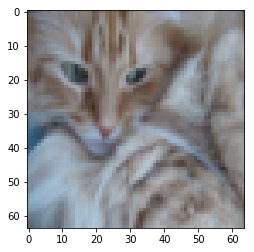

In [24]:
index = 2
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

y = 0. It's a non-cat picture.


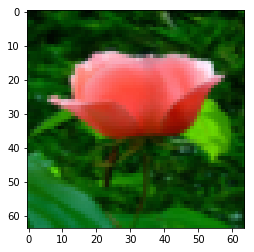

In [25]:
index = 3
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

根据AdaBoost的标签规则,更改y标签的值,从0,1改成-1,1.也就是说1为猫,-1为非猫。

In [26]:
train_y[train_y==0] = -1

In [27]:
print("New labels train_y is : ",train_y)

New labels train_y is :  [[-1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
   1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1
  -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1
  -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1
  -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1
   1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1
  -1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1
   1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [28]:
test_y[test_y==0] = -1

In [29]:
print("New labels test_y is : ",test_y)

New labels test_y is :  [[ 1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1  1
   1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1
   1 -1]]


In [31]:
def compute_error_big_data(threshs,x,y,W):
    G_x1 = y.copy()
    G_x2 = y.copy()

    length_x = x.shape[0]
    bestParameters = {'Thresh_error':np.inf}
    for thresh in threshs:
        for i in range(length_x):
            # Try to split each feature.
            index_gt = np.where(x[i,:]>thresh)[0] # find index in copy data
            index_lt = np.where(x[i,:]<=thresh)[0]
            G_x1[:,index_gt] = -1. # changed values in copy data,Implementate thresh split
            G_x1[:,index_lt] = 1.

            G_x2[:,index_gt] = 1. # we need try two situations.
            G_x2[:,index_lt] = -1.
        
            error_1 = np.sum(W[G_x1 !=y])
           
            error_2 = np.sum(W[G_x2 != y])

            if error_1 < error_2:
                if error_1 < bestParameters['Thresh_error']:
                    bestParameters['Thresh_error'] = error_1.copy()
                    bestParameters['bestGx'] = G_x1.copy()
                    bestParameters['bestThresh'] = thresh
                    bestParameters['Feture_number'] = i
                    bestParameters['choose_split_method'] = "G_x1"  
            else:
                if error_2 < bestParameters['Thresh_error']:
                    bestParameters['Thresh_error'] = error_2.copy()
                    bestParameters['bestGx'] = G_x2.copy()
                    bestParameters['bestThresh'] = thresh
                    bestParameters['Feture_number'] = i
                    bestParameters['choose_split_method'] = "G_x2"
            

    return bestParameters

In [32]:
def compute_fx_for_big(alpha,G_x,y):
   
    """
    build Classifier sign[f(x)]
    
    Returns:
        
        if fx equals label y,then we can break for loop,so we return False ,otherwise return True
    """
    fx = np.multiply(alpha,G_x).sum(axis=0,keepdims=True)  # Implement f(x) = alpha_1G_1(x) + ... + alpha_nG_n(x)
   
    
    fx=np.sign(fx) # calculate "sign"

    if np.array_equal(fx,y):
        print("划分结束")
        return alpha[1:],False  # alpha values is 0 when alpha index=1,so,alpha index start 1
    else:
        
        return alpha[1:],True

In [33]:
def main_big_data(X,Y,epoch_num):
    
    W = np.abs(Y)/Y.shape[1]
    
    threshs = np.arange(np.min(X),np.max(X),0.1)
    
    cache_alphas = np.zeros(shape=(1,1))
    cache_Gx = np.zeros(Y.shape)
    cache_Feture_number = []
    cache_bestThresh = []
    cache_choose_split_method = []
    
    for epoch in range(epoch_num):
        # select best thresh,error,Gx
        bestParameters = compute_error_big_data(threshs=threshs,x=X,y=Y,W=W)
    
        Thresh_error = bestParameters['Thresh_error']
        bestGx = bestParameters['bestGx']
        bestThresh = bestParameters['bestThresh']
        Feture_number = bestParameters['Feture_number']
        choose_split_method = bestParameters['choose_split_method']
        # cache parameters
        cache_Gx = np.vstack((cache_Gx,bestGx))
        cache_Feture_number.append(Feture_number)
        cache_bestThresh.append(bestThresh)
        cache_choose_split_method.append(choose_split_method)
        
        # compute alpha
        alpha = compute_alpha(error=Thresh_error)
        cache_alphas = np.vstack((cache_alphas,alpha))
        
        # update weigths
        Z,W = compute_Z(W=W,alpha=alpha,G_x=bestGx,y=Y)
        W = compute_W(W=W,Z=Z,alpha=alpha,y=Y,G_x=bestGx)
       
        ALPHA,result = compute_fx_for_big(alpha=cache_alphas,G_x=cache_Gx,y=Y)
        

        if not result:
            return ALPHA,cache_Feture_number,cache_bestThresh,cache_choose_split_method
    else:
        print('程序执行完成,没有找到error=0的alpha.')
        return ALPHA,cache_Feture_number,cache_bestThresh,cache_choose_split_method
       

In [81]:
ALPHA,cache_Feture_number,cache_bestThresh,cache_choose_split_method = main_big_data(X=train_x,Y=train_y,epoch_num=10)
print("alphs is : ",ALPHA)
print("Feture_number is :",cache_Feture_number)
print("bestThresh is: ",cache_bestThresh)
print("choose split method is :",cache_choose_split_method)

继续划分
继续划分
继续划分
继续划分
继续划分
继续划分
继续划分
继续划分
继续划分
继续划分
程序执行完成,没有找到error=0的alpha.
alphs is :  [[0.39771301]
 [0.29700389]
 [0.27924294]
 [0.30188662]
 [0.29432608]
 [0.32694691]
 [0.28944803]
 [0.28945674]
 [0.31691203]
 [0.28881598]]
Feture_number is : [10649, 5484, 8595, 3370, 1578, 772, 198, 7925, 6166, 9059]
bestThresh is:  [0.5, 0.5, 0.5, 0.4, 0.30000000000000004, 0.30000000000000004, 0.4, 0.5, 0.4, 0.2]
choose split method is : ['G_x2', 'G_x1', 'G_x2', 'G_x1', 'G_x2', 'G_x1', 'G_x2', 'G_x2', 'G_x1', 'G_x2']


In [34]:
def predict(test_X,test_Y,alphas,Feture_number,bestThresh,choose_split_method):
    
    G_x = np.zeros(test_Y.shape)
    
    for i in range(alphas.shape[0]):
        G_x_single = np.ones(shape=(test_Y.shape))
        # must choose one feture to split lable.
        index_gt = np.where(test_X[Feture_number[i],:] > bestThresh[i])[0] 
        index_lt = np.where(test_X[Feture_number[i],:] <= bestThresh[i])[0]
        if choose_split_method[i] == "G_x1":
            G_x_single[:,index_gt] = -1. 
            G_x_single[:,index_lt] = 1.
            G_x = np.vstack((G_x,G_x_single))
        else:
            G_x_single[:,index_gt] = 1. 
            G_x_single[:,index_lt] = -1.
            G_x = np.vstack((G_x,G_x_single))
            
    # Compute fx
    fx = np.multiply(alphas,G_x[1:]).sum(axis=0,keepdims=True)
    fx = np.sign(fx)
    
    # calculate accurate.
    accurate = np.sum(fx==test_Y) / test_Y.shape[1]
    
    return accurate

In [83]:
accurate = predict(test_X=train_x,test_Y=train_y,alphas=ALPHA,Feture_number=cache_Feture_number,
        bestThresh=cache_bestThresh,choose_split_method=cache_choose_split_method)
print("The Test accurate is : ",fx)

accurate is :  0.84688995215311
The f(x) is :  [[-1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.
  -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.
  -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.
  -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
  -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
   1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.
   1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.
   1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1. -1.
  -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1.
  -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.]]


In [84]:
fx = predict(test_X=test_x,test_Y=test_y,alphas=ALPHA,Feture_number=cache_Feture_number,
        bestThresh=cache_bestThresh,choose_split_method=cache_choose_split_method)
print("The f(x) is : ",fx)

accurate is :  0.66
The f(x) is :  [[ 1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.
  -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1.
  -1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.]]


我们可以看出当分类器达到44个的时候,该样本就一样能够产生0误差,并且接下去的所有训练样本误差和测试样本误差都不会发生变化.
且这种由error为0产生的全分类器,很明显会产生较高的过拟合.

In [35]:
def different_epoch_num():
    
    plot_accurate = []
    for i in range(1,50,5):
        
        ALPHA,cache_Feture_number,cache_bestThresh,cache_choose_split_method = main_big_data(X=train_x,Y=train_y,epoch_num=i)
        
        accurate = predict(test_X=train_x,test_Y=train_y,alphas=ALPHA,Feture_number=cache_Feture_number,
            bestThresh=cache_bestThresh,choose_split_method=cache_choose_split_method)
        print("After iter:{}, The Train set accurate is : ".format(i),accurate)
        
        accurate = predict(test_X=test_x,test_Y=test_y,alphas=ALPHA,Feture_number=cache_Feture_number,
            bestThresh=cache_bestThresh,choose_split_method=cache_choose_split_method)
        print("After iter:{}, The Test set accurate is : ".format(i),accurate)
    

In [36]:
different_epoch_num()

程序执行完成,没有找到error=0的alpha.
After iter:1, The Train set accurate is :  0.6889952153110048
After iter:1, The Test set accurate is :  0.58
程序执行完成,没有找到error=0的alpha.
After iter:6, The Train set accurate is :  0.7703349282296651
After iter:6, The Test set accurate is :  0.58
程序执行完成,没有找到error=0的alpha.
After iter:11, The Train set accurate is :  0.8803827751196173
After iter:11, The Test set accurate is :  0.64
程序执行完成,没有找到error=0的alpha.
After iter:16, The Train set accurate is :  0.8995215311004785
After iter:16, The Test set accurate is :  0.58
程序执行完成,没有找到error=0的alpha.
After iter:21, The Train set accurate is :  0.9617224880382775
After iter:21, The Test set accurate is :  0.66
程序执行完成,没有找到error=0的alpha.
After iter:26, The Train set accurate is :  0.9712918660287081
After iter:26, The Test set accurate is :  0.58
程序执行完成,没有找到error=0的alpha.
After iter:31, The Train set accurate is :  0.9904306220095693
After iter:31, The Test set accurate is :  0.58
程序执行完成,没有找到error=0的alpha.
After iter:36, The 

| 迭代次数 | 训练样本正确率 | 测试样本正确率 |
| ------ | ------- | ------ |
| 1 | 0.68 | 0.58 |
| 6 | 0.77 | 0.58 |
| 11 | 0.88 | 0.64 |
| 16 | 0.89 | 0.58 |
| 21 | 0.96 | 0.66 |
| 26 | 0.97 | 0.58 |
| 31 | 0.99 | 0.58 |
| 36 | 0.99 | 0.6 |
| 41 | 0.99 | 0.66 |
| 46 | 1.0 | 0.58 |

可以看到随着迭代次数的增加,训练样本的正确率逐步升高,测试样本的正确率先升高然后降低(或者说在一定范围浮动),很明显在最大分类器46以后,再进行更多次数的迭代是毫无意义的,应该46已经是最大分类器的数量(实际上这里的最大分类器是44)，测试样本的正确率在分类器44以后都维持在0.58.所以按照上面的表格,我们应该选择分类器为41个左右的弱分类器所组成的强分类器是最好的

另外也可以看出随着分类器的个数的增加到一定限度,算法就开始呈现过拟合的状态.